# Project Overview  

The objective of this project is to analyze **3 million grocery orders** from more than **200,000 Instacart users** and predict which previously purchased item will be in the user's next order.  

### Key Aspects:  
- **Customer segmentation** and **affinity analysis** to study purchase patterns.  
- **Better product marketing** and **cross-selling strategies**.  

---

## Dataset Details  

### Order Set Information  
This file indicates to which set an order belongs:  
- **Prior**  
- **Train**  
- **Test**  

You are predicting **reordered items** only for the **test set orders**.  

### Features  
- **`order_dow`**: Represents the **day of the week** on which the order was placed.  

---

## Order Products Data  

### File: `order_products__prior.csv`  
This file contains **previous order contents** for all customers.  

- **`reordered`**:  
  - Indicates if a customer has **previously ordered the product**.  
  - Some orders **may have no reordered items**.  
  - You may **explicitly predict 'None'** for such orders.  

For full evaluation details, refer to the **evaluation page**.  


df['col1'] = df['col1'].astype('int16') # Manual downcasting 

or

df['col1'] = pd.to_numeric(df['col1'], downcast='integer') # Automatic Down casting 

df['col2'] = pd.to_numeric(df['col2'], downcast='integer')

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
aisels = pd.read_csv(r"instacart-market_basket_analysis\aisles.csv")
departments = pd.read_csv(r"instacart-market_basket_analysis\departments.csv")
orders = pd.read_csv(r"instacart-market_basket_analysis\orders.csv")
products = pd.read_csv(r"instacart-market_basket_analysis\products.csv")
order_products_prior = pd.read_csv(r"instacart-market_basket_analysis\order_products__prior.csv")
order_products_train = pd.read_csv(r"instacart-market_basket_analysis\order_products__train.csv")
sample_submission = pd.read_csv(r"instacart-market_basket_analysis\sample_submission.csv")


In [78]:
sample_submission.head()

,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259


In [16]:
aisels.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [10]:
aisels.nunique()

aisle_id    134
aisle       134
dtype: int64

In [125]:
unique_products = aisels['aisle'].unique()
print(unique_products)


['prepared soups salads' 'specialty cheeses' 'energy granola bars'
 'instant foods' 'marinades meat preparation' 'other' 'packaged meat'
 'bakery desserts' 'pasta sauce' 'kitchen supplies' 'cold flu allergy'
 'fresh pasta' 'prepared meals' 'tofu meat alternatives'
 'packaged seafood' 'fresh herbs' 'baking ingredients'
 'bulk dried fruits vegetables' 'oils vinegars' 'oral hygiene'
 'packaged cheese' 'hair care' 'popcorn jerky' 'fresh fruits' 'soap'
 'coffee' 'beers coolers' 'red wines' 'honeys syrups nectars'
 'latino foods' 'refrigerated' 'packaged produce' 'kosher foods'
 'frozen meat seafood' 'poultry counter' 'butter' 'ice cream ice'
 'frozen meals' 'seafood counter' 'dog food care' 'cat food care'
 'frozen vegan vegetarian' 'buns rolls' 'eye ear care' 'candy chocolate'
 'mint gum' 'vitamins supplements' 'breakfast bars pastries'
 'packaged poultry' 'fruit vegetable snacks' 'preserved dips spreads'
 'frozen breakfast' 'cream' 'paper goods' 'shave needs' 'diapers wipes'
 'granola' 'f

In [11]:
aisels.shape

(134, 2)

In [14]:
aisels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [17]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [18]:
departments.nunique()

department_id    21
department       21
dtype: int64

In [20]:
departments.shape

(21, 2)

In [19]:
departments.dtypes

department_id     int64
department       object
dtype: object

In [21]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [10]:
departments.department.unique()

array(['frozen', 'other', 'bakery', 'produce', 'alcohol', 'international',
       'beverages', 'pets', 'dry goods pasta', 'bulk', 'personal care',
       'meat seafood', 'pantry', 'breakfast', 'canned goods',
       'dairy eggs', 'household', 'babies', 'snacks', 'deli', 'missing'],
      dtype=object)

1. **Days Since Prior Order Analysis:**
   - Peaks observed on days **8, 15, 22, and 30**, meansa people order once a week.
   - Days **8** and **30** show the most common customer behavior for placing orders.

2. **Day Mapping:**
   - `0`: Saturday  
   - `1`: Sunday  
   - `2`: Monday  
   - `3`: Tuesday  
   - `4`: Wednesday  
   - `5`: Thursday  
   - `6`: Friday  

   - **Order Trends:**  
     - Most orders are placed on **Saturday** and **Sunday** assumption as people have holiday.

3. **Majority of Orders are placed during daytime**
   - In Morning of Sunday and Afternoon of Saturday are the prime time 
   - Tuesday, Wednesday and Thursday have relatively we less customers during daytime as compared to other days of week.
   - On friday there is again increase of customers during prime day hours 11-3.


In [22]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [23]:
orders.shape

(3421083, 7)

In [25]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [26]:
orders['eval_set'].value_counts()

eval_set
prior    3214874
train     131209
test       75000
Name: count, dtype: int64

In [19]:
orders_prior = orders[orders['eval_set']=='prior']
orders_train = orders[orders['eval_set']=='train']
orders_test = orders[orders['eval_set']=='test']

In [65]:
orders_prior['user_id'].nunique()

206209

In [66]:
orders_prior['order_dow'].value_counts().sort_index()

order_dow
0    557772
1    556705
2    441955
3    412400
4    401212
5    425982
6    418848
Name: count, dtype: int64

In [67]:
orders_prior['order_hour_of_day'].value_counts().sort_index()

order_hour_of_day
0      21372
1      11596
2       7070
3       5120
4       5175
5       8972
6      28792
7      86656
8     168321
9     243496
10    271885
11    268006
12    256206
13    261174
14    265556
15    266132
16    255949
17    214080
18    170998
19    131620
20     98109
21     73436
22     57540
23     37613
Name: count, dtype: int64

In [68]:
orders_prior['order_number'].value_counts().sort_index()

order_number
1     206209
2     206209
3     206209
4     182223
5     162633
       ...  
95      1592
96      1525
97      1471
98      1421
99      1374
Name: count, Length: 99, dtype: int64

In [ ]:
orders

In [69]:
orders['order_number'].nunique()

100

In [70]:
orders_prior['days_since_prior_order'].value_counts().sort_index()

days_since_prior_order
0.0      64436
1.0     141011
2.0     187723
3.0     210665
4.0     214488
5.0     206691
6.0     230245
7.0     306181
8.0     173259
9.0     112184
10.0     90198
11.0     76394
12.0     71356
13.0     77765
14.0     93064
15.0     61883
16.0     43423
17.0     36281
18.0     33050
19.0     31408
20.0     35173
21.0     41262
22.0     29125
23.0     21629
24.0     18704
25.0     17324
26.0     17120
27.0     19677
28.0     23833
29.0     16976
30.0    306137
Name: count, dtype: int64

In [89]:
order_number = orders.groupby('user_id')['order_number'].max()
order_number = order_number.value_counts()
order_number

order_number
4     23986
5     19590
6     16165
7     13850
8     11700
      ...  
94       57
91       56
97       54
98       50
99       47
Name: count, Length: 97, dtype: int64

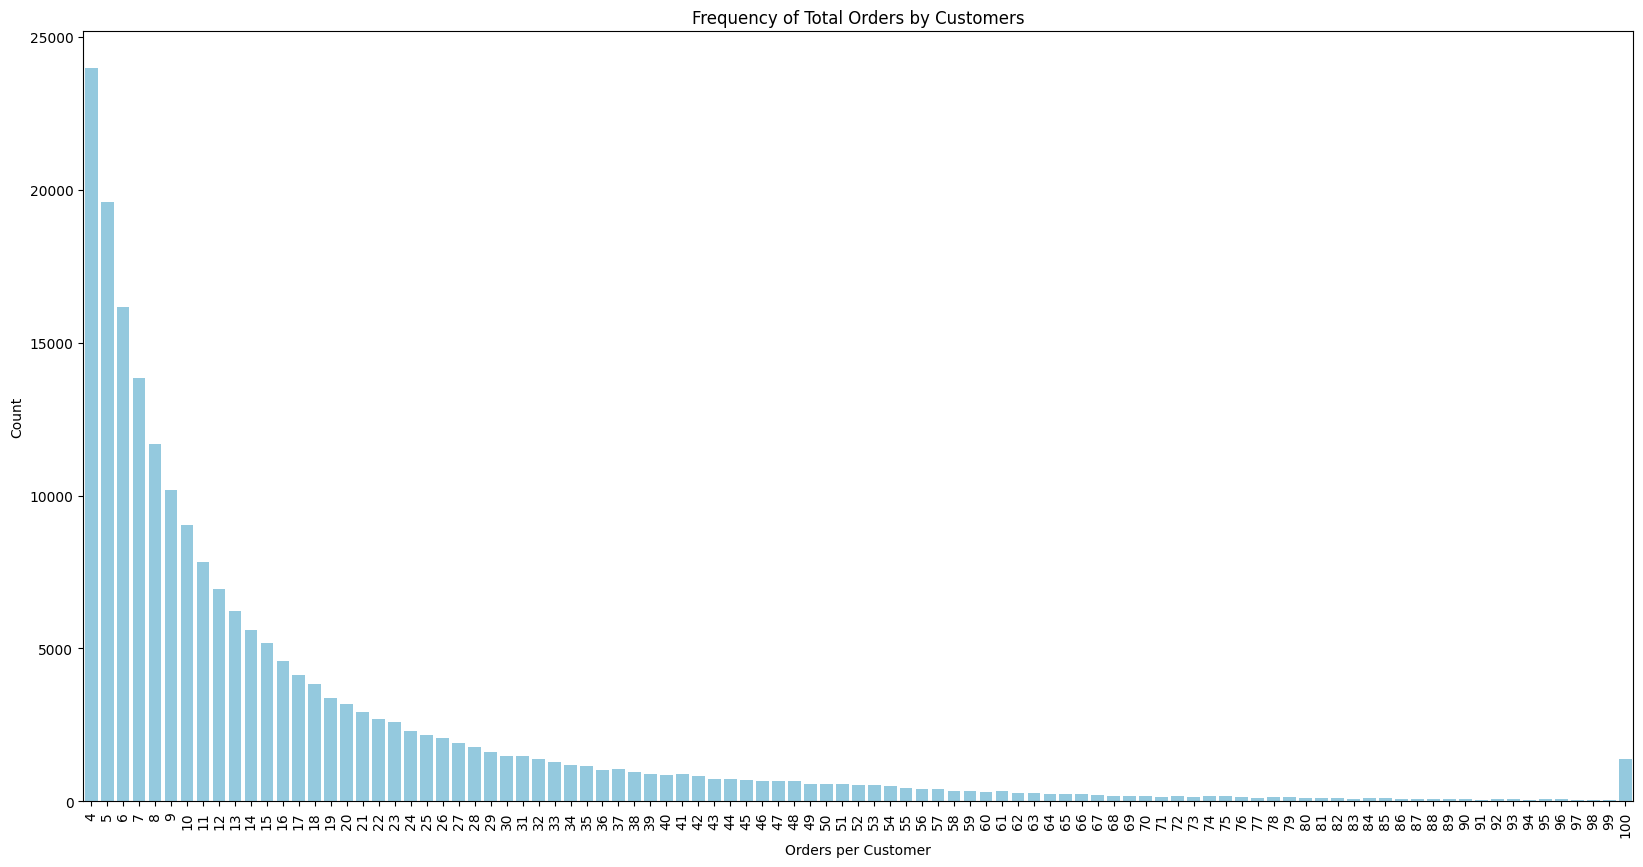

In [77]:
fig,ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x=order_number.index, y = order_number.values, color = 'skyblue')
ax.set_xlabel("Orders per Customer")
ax.set_ylabel("Count")
ax.xaxis.set_tick_params(rotation=90,labelsize=10)
ax.set_title('Frequency of Total Orders by Customers')
plt.show()

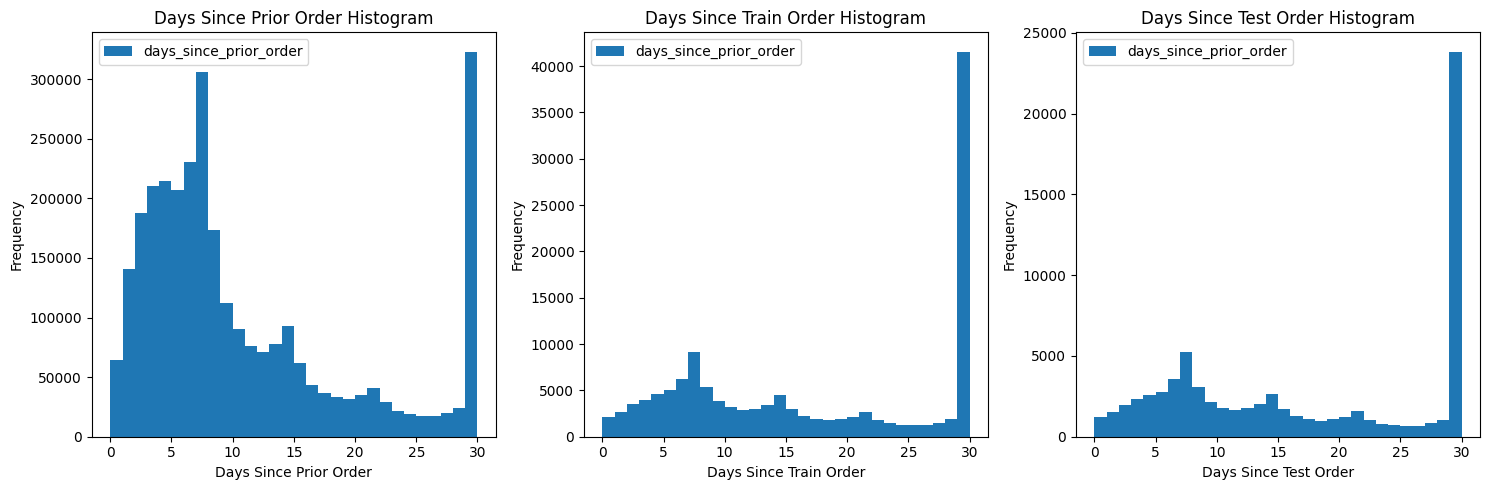

In [38]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

orders_prior.plot(kind='hist', y='days_since_prior_order', bins=30, ax=axes[0], title='Days Since Prior Order Histogram')
axes[0].set_xlabel('Days Since Prior Order') 
axes[0].set_ylabel('Frequency')              

orders_train.plot(kind='hist', y='days_since_prior_order', bins=30, ax=axes[1], title='Days Since Train Order Histogram')
axes[1].set_xlabel('Days Since Train Order')

orders_test.plot(kind='hist', y='days_since_prior_order', bins=30, ax=axes[2], title='Days Since Test Order Histogram')
axes[2].set_xlabel('Days Since Test Order')

plt.tight_layout()
plt.show()


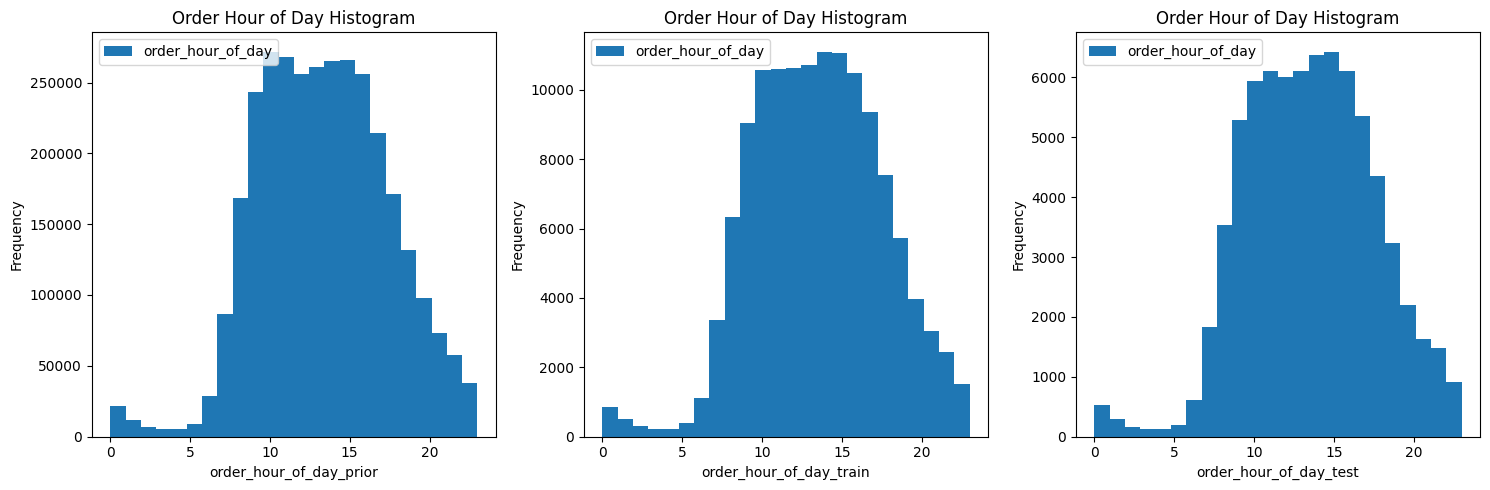

In [42]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5))

orders_prior.plot(kind='hist', y='order_hour_of_day', bins=24, ax=axes[0],title='Order Hour of Day Histogram')
axes[0].set_xlabel('order_hour_of_day_prior') 
axes[0].set_ylabel('Frequency') 

orders_train.plot(kind='hist',y='order_hour_of_day', bins=24,ax=axes[1], title='Order Hour of Day Histogram')
axes[1].set_xlabel('order_hour_of_day_train') 

orders_test.plot(kind='hist',y='order_hour_of_day', bins=24,ax=axes[2], title='Order Hour of Day Histogram')
axes[2].set_xlabel('order_hour_of_day_test') 

plt.tight_layout()
plt.show()

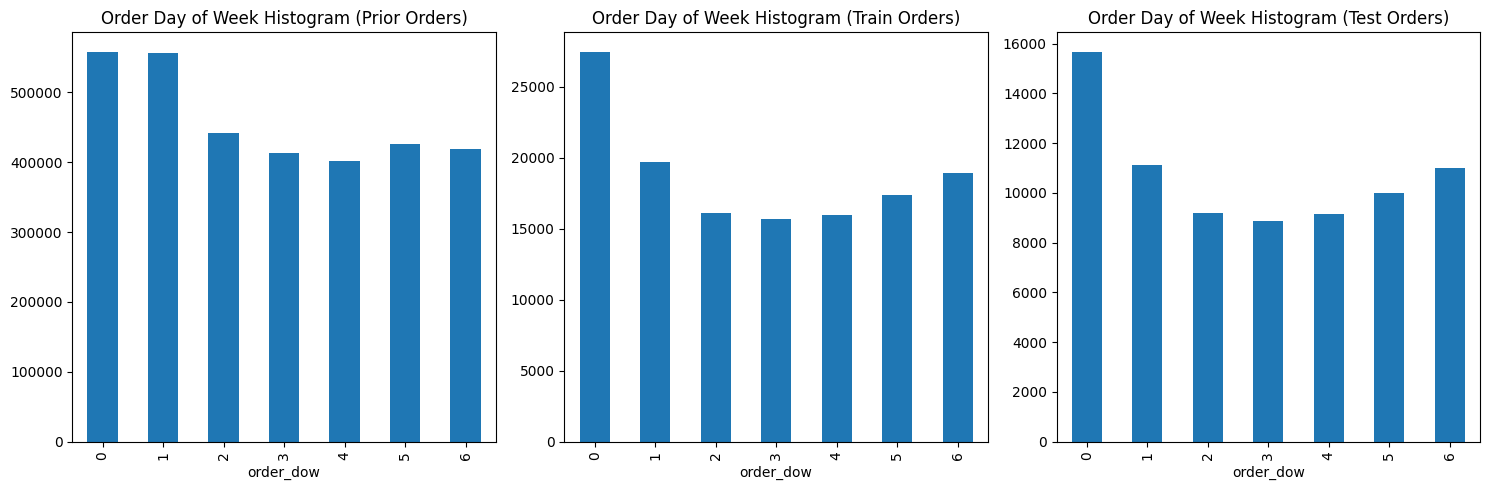

In [84]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plotting the bar chart for the 'order_dow' in each dataset
orders_prior['order_dow'].value_counts().sort_index().plot(kind='bar', ax=axes[0], title='Order Day of Week Histogram (Prior Orders)')
orders_train['order_dow'].value_counts().sort_index().plot(kind='bar', ax=axes[1], title='Order Day of Week Histogram (Train Orders)')
orders_test['order_dow'].value_counts().sort_index().plot(kind='bar', ax=axes[2], title='Order Day of Week Histogram (Test Orders)')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [90]:
total_unique_users = orders.groupby('order_dow')['user_id'].nunique()
total_unique_users

order_dow
0    152288
1    158096
2    146968
3    142172
4    139368
5    140892
6    135123
Name: user_id, dtype: int64

<Axes: title={'center': 'Total Unique Users by Day of Week'}, xlabel='order_dow'>

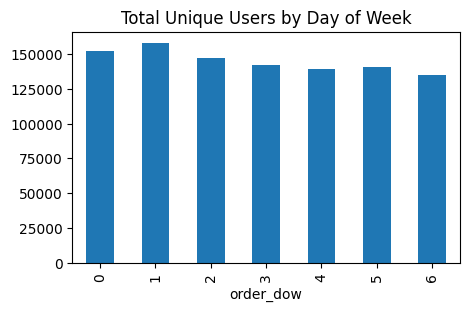

In [106]:
color = sns.color_palette()
total_unique_users.plot(kind='bar', figsize=(5,3),title='Total Unique Users by Day of Week', color=color[0])

Text(0.5, 1.0, 'Total Unique Users per Day of Week')

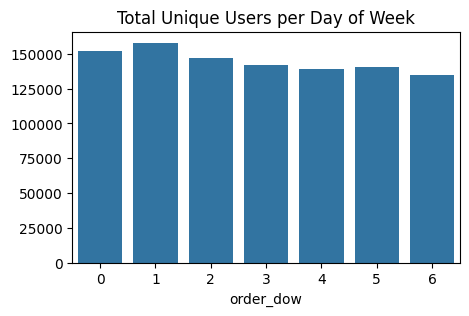

In [101]:
fig, ax = plt.subplots(figsize = (5,3))
ax = sns.barplot(x = total_unique_users.index, y = total_unique_users.values)
ax.set_title('Total Unique Users per Day of Week')

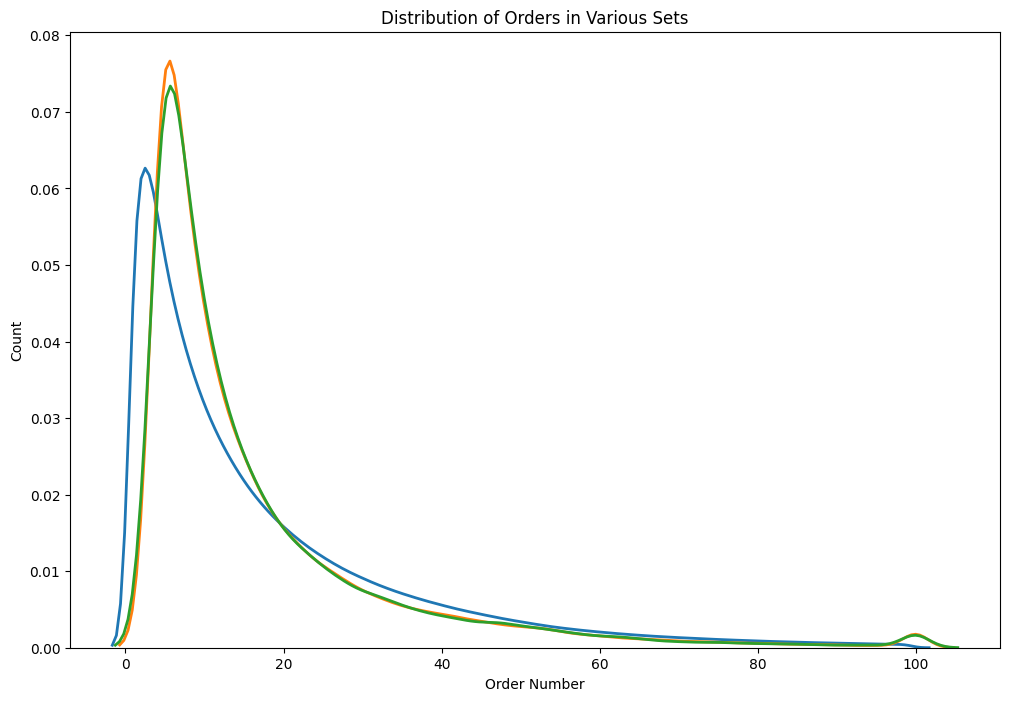

In [88]:
fig, ax = plt.subplots(figsize = (12,8))
ax = sns.kdeplot(orders.order_number[orders.eval_set == 'prior'], label = "Prior set", lw = 2)
ax = sns.kdeplot(orders.order_number[orders.eval_set == 'train'], label = "Train set", lw = 2)
ax = sns.kdeplot(orders.order_number[orders.eval_set == 'test'], label = "Test set", lw = 2)
ax.set_xlabel('Order Number')
ax.set_ylabel('Count')
ax.tick_params(axis = 'both', labelsize = 10)
ax.set_title('Distribution of Orders in Various Sets')
fig.savefig('Distribution of Orders in Various Sets.png')
plt.show()

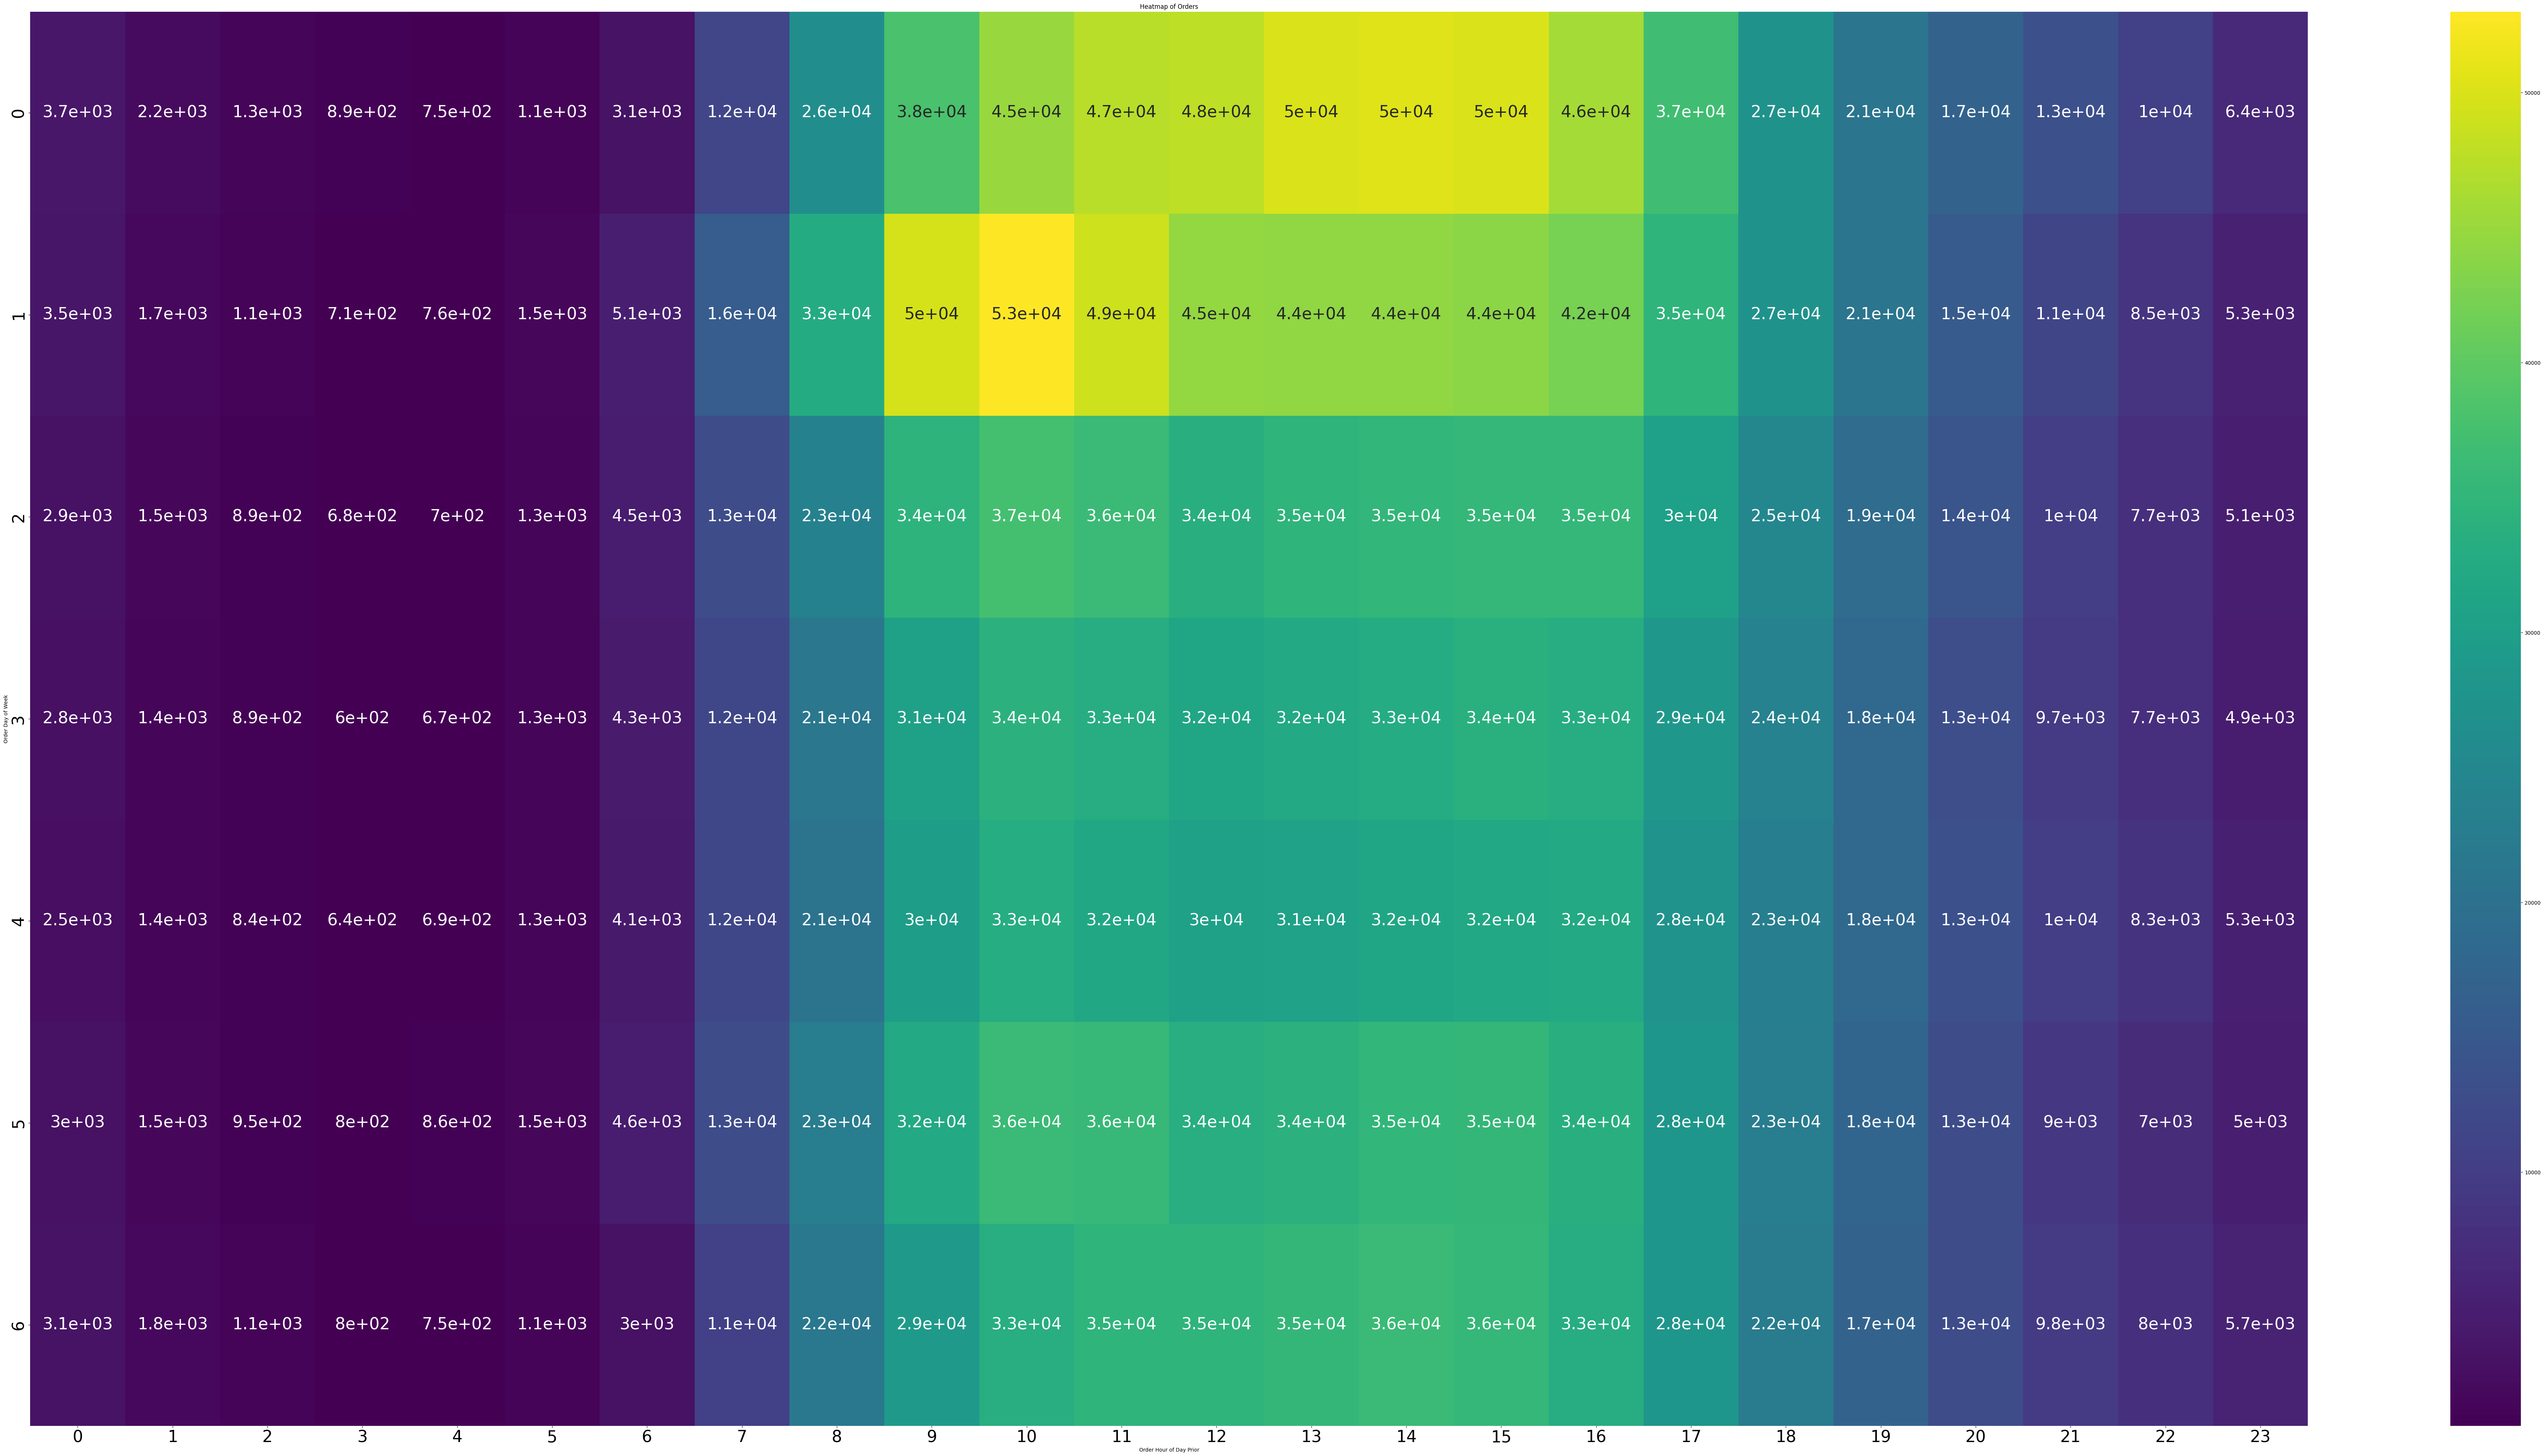

In [64]:
heatmap_data = orders_prior.pivot_table(
    index='order_dow',  
    columns='order_hour_of_day', 
    values='order_id', 
    aggfunc='count' 
)

plt.figure(figsize=(100,50))
sns.heatmap(heatmap_data, annot=True, cmap='viridis',annot_kws={"size": 32})
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)
plt.title('Heatmap of Orders')
plt.xlabel('Order Hour of Day Prior')
plt.ylabel('Order Day of Week')
plt.show()

In [48]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [50]:
products.shape

(49688, 4)

In [53]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [62]:
unique_product_ids = products['product_id'].nunique()
unique_product_names = products['product_name'].nunique()
print(f"Unique product IDs: {unique_product_ids}, Unique product names: {unique_product_names}")


Unique product IDs: 49688, Unique product names: 49688


In [130]:
products['aisle_id'].value_counts().nlargest(20)

aisle_id
100    1258
45     1246
37     1091
47     1038
120    1026
107     989
94      894
21      891
38      880
61      874
3       832
22      816
104     797
98      792
78      747
69      737
92      718
26      680
31      675
114     655
Name: count, dtype: int64

In [131]:
products['aisle_id'].value_counts().sum()

49688

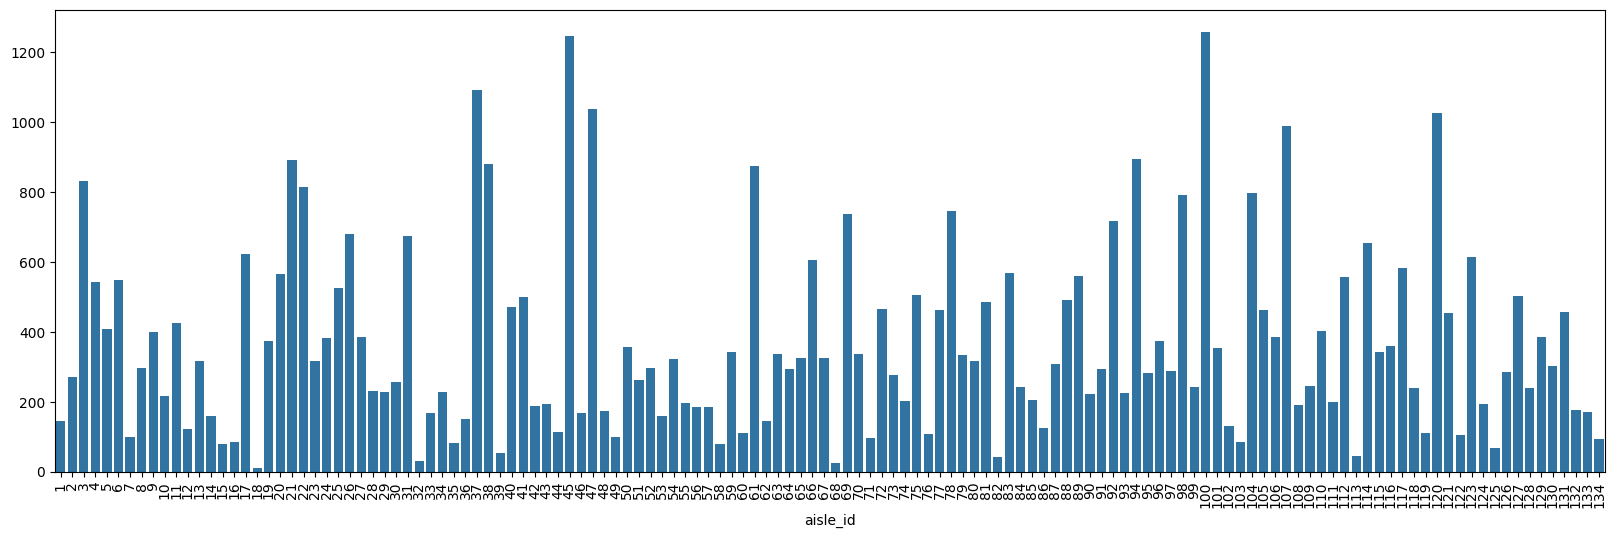

In [121]:
plt.figure(figsize=(20,6))
sns.barplot(x=products['aisle_id'].value_counts().index, y=products['aisle_id'].value_counts().values)
plt.gca().xaxis.set_tick_params(rotation=90, labelsize=10)
plt.show()

In [3]:
products['department_id'].value_counts()

department_id
11    6563
19    6264
13    5371
7     4365
1     4007
16    3449
17    3085
15    2092
9     1858
4     1684
3     1516
20    1322
21    1258
6     1139
14    1115
18    1081
5     1054
8      972
12     907
2      548
10      38
Name: count, dtype: int64

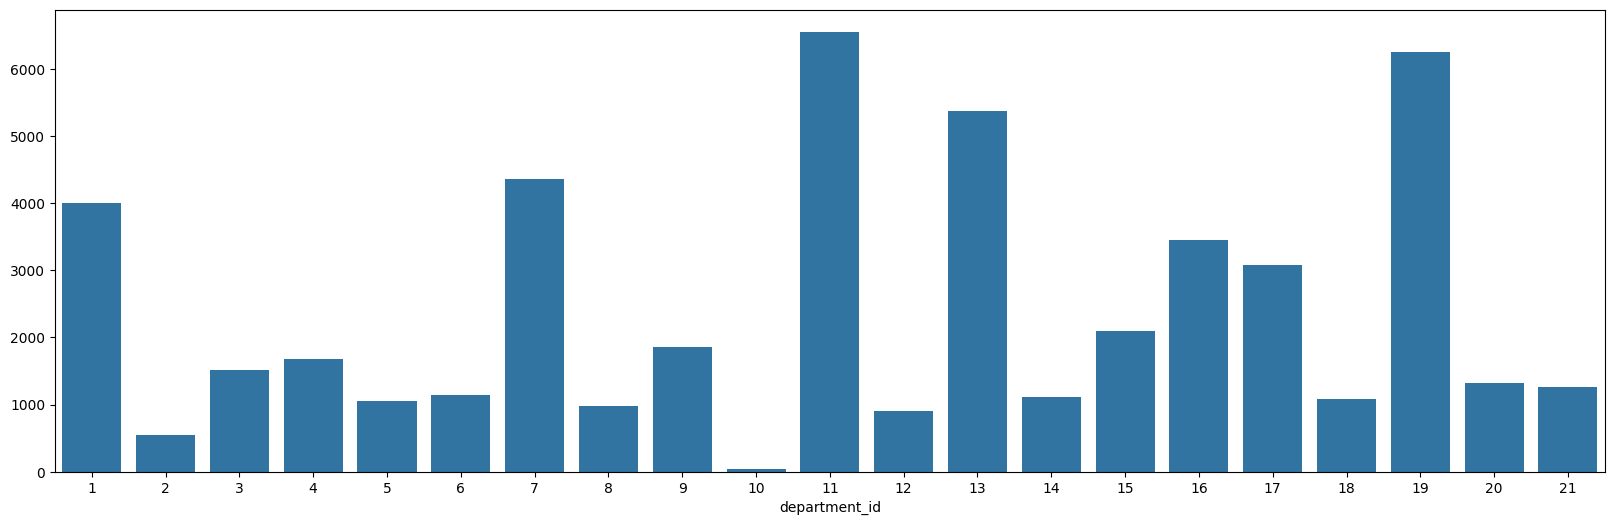

In [8]:
plt.figure(figsize=(20,6))
sns.barplot(x=products['department_id'].value_counts().index, y=products['department_id'].value_counts().values)
plt.gca().xaxis.set_tick_params(rotation=0, labelsize=10)
plt.show()

In [54]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [55]:
order_products_prior.shape

(32434489, 4)

In [60]:
order_products_prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [63]:
order_products_prior['add_to_cart_order'].value_counts().sort_index()

add_to_cart_order
1      3214874
2      3058126
3      2871133
4      2664106
5      2442025
        ...   
141          1
142          1
143          1
144          1
145          1
Name: count, Length: 145, dtype: int64

In [64]:
order_products_prior['reordered'].value_counts().sort_index()


reordered
0    13307953
1    19126536
Name: count, dtype: int64

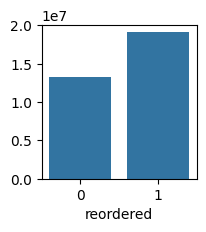

In [13]:
plt.figure(figsize=(2,2))
sns.barplot(x=order_products_prior['reordered'].value_counts().index,y=order_products_prior['reordered'].value_counts().values)
plt.show()


In [65]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [66]:
order_products_train.shape

(1384617, 4)

In [67]:
order_products_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


In [68]:
order_products_train['add_to_cart_order'].value_counts().sort_index()

add_to_cart_order
1     131209
2     124364
3     116996
4     108963
5     100745
       ...  
76         5
77         3
78         2
79         2
80         2
Name: count, Length: 80, dtype: int64

In [69]:
order_products_train['reordered'].value_counts().sort_index()   

reordered
0    555793
1    828824
Name: count, dtype: int64

In [70]:
order_products_prior_columns = set(order_products_prior.columns)
order_products_train_columns = set(order_products_train.columns)
orders_columns = set(orders.columns)
products_columns = set(products.columns)
aisels_columns = set(aisels.columns)
departments_columns = set(departments.columns)
print(order_products_prior_columns)
print(order_products_train_columns)
print(orders_columns)
print(products_columns)
print(aisels_columns)
print(departments_columns)


{'product_id', 'reordered', 'add_to_cart_order', 'order_id'}
{'product_id', 'reordered', 'add_to_cart_order', 'order_id'}
{'order_dow', 'eval_set', 'order_id', 'order_number', 'order_hour_of_day', 'days_since_prior_order', 'user_id'}
{'product_id', 'aisle_id', 'product_name', 'department_id'}
{'aisle_id', 'aisle'}
{'department_id', 'department'}


In [95]:
order_products_prior_nulls = (order_products_prior.isnull().sum())
order_products_train_nulls = (order_products_train.isnull().sum())
orders_nulls = (orders.isnull().sum())
products_nulls = (products.isnull().sum())
aisels_nulls = (aisels.isnull().sum())
departments_nulls = (departments.isnull().sum())
print(order_products_prior_nulls)
print(order_products_train_nulls)
print(orders_nulls)
print(products_nulls)
print(aisels_nulls)
print(departments_nulls)

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64
product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64
aisle_id    0
aisle       0
dtype: int64
department_id    0
department       0
dtype: int64
